In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utilities.dataloader import get_train_test_loaders, get_cv_train_test_loaders
from utilities.model import CustomVGG
from utilities.helper import train, evaluate, predict_localize
from utilities.constants import NEG_CLASS

ModuleNotFoundError: No module named 'utils.constants'

In [28]:
!pip install torch==1.12.1 torchvision==0.13.1 torchaudio==0.12.1

  Using cached torch-1.12.1-cp38-cp38-win_amd64.whl (161.9 MB)
     ---------------------------------------- 1.1/1.1 MB 9.7 MB/s eta 0:00:00
     ------------------------------------- 969.5/969.5 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0
    Uninstalling torchvision-0.14.0:
      Successfully uninstalled torchvision-0.14.0



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
pip install --upgrade pip

  Using cached pip-22.3-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


## Parameters

In [18]:
data_folder = "E:\MVTec_DefectDetection"
subset_name = "leather"
data_folder = os.path.join(data_folder, subset_name)

batch_size = 10
target_train_accuracy = 0.98
lr = 0.0001
epochs = 30
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

heatmap_thres = 0.7
n_cv_folds = 5

NameError: name 'NEG_CLASS' is not defined

# Data

In [10]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42,
)

Dataset E:\MVTec_DefectDetection\leather: N Images = 369, Share of anomalies = 0.249


In [11]:
print(train_loader)
print(test_loader)

# Model Training

In [12]:
model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
model = train(
    train_loader, model, optimizer, criterion, epochs, device, target_train_accuracy
)

Epoch 1/30: Loss = 0.5445, Accuracy = 0.8103
Epoch 2/30: 

In [11]:
model_path = f"weights/{subset_name}_model.h5"
torch.save(model, model_path)
# model = torch.load(model_path, map_location=device)

# Evaluation

Accuracy: 0.9459
Balanced Accuracy: 0.9636



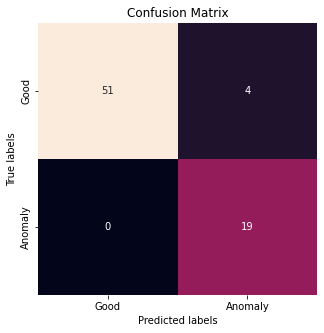

In [12]:
evaluate(model, test_loader, device)

# Cross Validation

Dataset E:\MVTec_DefectDetection\leather: N Images = 369, Share of anomalies = 0.249
Fold 1/5


C:\Users\USER\AppData\Local\Temp/ipykernel_5620/2213926453.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)


Epoch 1/30: Loss = 0.5445, Accuracy = 0.7483
Epoch 2/30: Loss = 0.1992, Accuracy = 0.9310
Epoch 3/30: Loss = 0.2492, Accuracy = 0.9034
Epoch 4/30: Loss = 0.1386, Accuracy = 0.9517
Epoch 5/30: Loss = 0.1272, Accuracy = 0.9483
Epoch 6/30: Loss = 0.1209, Accuracy = 0.9483
Epoch 7/30: Loss = 0.1084, Accuracy = 0.9690
Epoch 8/30: Loss = 0.0471, Accuracy = 0.9793
Epoch 9/30: Loss = 0.1633, Accuracy = 0.9414
Epoch 10/30: Loss = 0.0948, Accuracy = 0.9759
Epoch 11/30: Loss = 0.0161, Accuracy = 0.9966
Epoch 12/30: Loss = 0.0129, Accuracy = 0.9966
Epoch 13/30: Loss = 0.0899, Accuracy = 0.9690
Epoch 14/30: Loss = 0.0546, Accuracy = 0.9862
Epoch 15/30: Loss = 0.0231, Accuracy = 0.9897
Epoch 16/30: Loss = 0.1038, Accuracy = 0.9621
Epoch 17/30: Loss = 0.0518, Accuracy = 0.9862
Epoch 18/30: Loss = 0.0201, Accuracy = 0.9966
Epoch 19/30: Loss = 0.0041, Accuracy = 1.0000
Epoch 20/30: Loss = 0.0014, Accuracy = 1.0000
Epoch 21/30: Loss = 0.0012, Accuracy = 1.0000
Epoch 22/30: Loss = 0.0007, Accuracy = 1.00

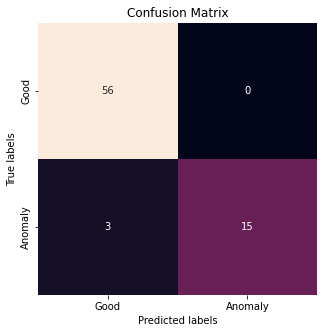

Fold 2/5
Epoch 1/30: Loss = 0.5076, Accuracy = 0.7483
Epoch 2/30: Loss = 0.2646, Accuracy = 0.8793
Epoch 3/30: Loss = 0.2024, Accuracy = 0.9138
Epoch 4/30: Loss = 0.1557, Accuracy = 0.9414
Epoch 5/30: Loss = 0.0989, Accuracy = 0.9724
Epoch 6/30: Loss = 0.1329, Accuracy = 0.9483
Epoch 7/30: Loss = 0.0722, Accuracy = 0.9828
Epoch 8/30: Loss = 0.0524, Accuracy = 0.9828
Epoch 9/30: Loss = 0.0954, Accuracy = 0.9586
Epoch 10/30: Loss = 0.0502, Accuracy = 0.9862
Epoch 11/30: Loss = 0.0346, Accuracy = 0.9897
Epoch 12/30: Loss = 0.0142, Accuracy = 0.9966
Epoch 13/30: Loss = 0.0226, Accuracy = 0.9897
Epoch 14/30: Loss = 0.1141, Accuracy = 0.9448
Epoch 15/30: Loss = 0.0295, Accuracy = 0.9862
Epoch 16/30: Loss = 0.0207, Accuracy = 0.9862
Epoch 17/30: Loss = 0.0403, Accuracy = 0.9862
Epoch 18/30: Loss = 0.0137, Accuracy = 1.0000
Epoch 19/30: Loss = 0.0045, Accuracy = 1.0000
Epoch 20/30: Loss = 0.0011, Accuracy = 1.0000
Epoch 21/30: Loss = 0.0010, Accuracy = 1.0000
Epoch 22/30: Loss = 0.0005, Accura

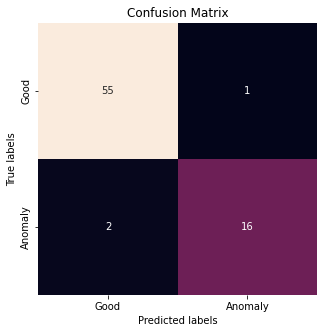

Fold 3/5
Epoch 1/30: Loss = 0.5544, Accuracy = 0.7621
Epoch 2/30: Loss = 0.2163, Accuracy = 0.8966
Epoch 3/30: Loss = 0.1652, Accuracy = 0.9276
Epoch 4/30: Loss = 0.1835, Accuracy = 0.9448
Epoch 5/30: Loss = 0.1500, Accuracy = 0.9483
Epoch 6/30: Loss = 0.0624, Accuracy = 0.9724
Epoch 7/30: Loss = 0.1111, Accuracy = 0.9586
Epoch 8/30: Loss = 0.0697, Accuracy = 0.9793
Epoch 9/30: Loss = 0.0432, Accuracy = 0.9828
Epoch 10/30: Loss = 0.0557, Accuracy = 0.9724
Epoch 11/30: Loss = 0.0137, Accuracy = 0.9966
Epoch 12/30: Loss = 0.0061, Accuracy = 1.0000
Epoch 13/30: Loss = 0.0666, Accuracy = 0.9759
Epoch 14/30: Loss = 0.0244, Accuracy = 0.9862
Epoch 15/30: Loss = 0.0046, Accuracy = 1.0000
Epoch 16/30: Loss = 0.0037, Accuracy = 1.0000
Epoch 17/30: Loss = 0.0010, Accuracy = 1.0000
Epoch 18/30: Loss = 0.0007, Accuracy = 1.0000
Epoch 19/30: Loss = 0.0005, Accuracy = 1.0000
Epoch 20/30: Loss = 0.0003, Accuracy = 1.0000
Epoch 21/30: Loss = 0.0004, Accuracy = 1.0000
Epoch 22/30: Loss = 0.0002, Accura

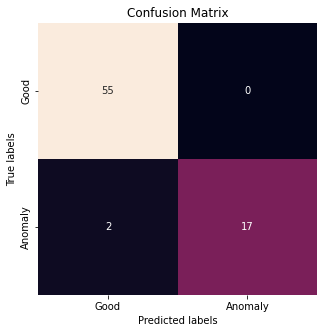

Fold 4/5
Epoch 1/30: Loss = 0.5011, Accuracy = 0.7586
Epoch 2/30: Loss = 0.2254, Accuracy = 0.8897
Epoch 3/30: Loss = 0.2331, Accuracy = 0.9172
Epoch 4/30: Loss = 0.1647, Accuracy = 0.9414
Epoch 5/30: Loss = 0.1576, Accuracy = 0.9448
Epoch 6/30: Loss = 0.1314, Accuracy = 0.9655
Epoch 7/30: Loss = 0.1133, Accuracy = 0.9586
Epoch 8/30: Loss = 0.0718, Accuracy = 0.9690
Epoch 9/30: Loss = 0.0897, Accuracy = 0.9655
Epoch 10/30: Loss = 0.1013, Accuracy = 0.9724
Epoch 11/30: Loss = 0.0485, Accuracy = 0.9793
Epoch 12/30: Loss = 0.0261, Accuracy = 0.9862
Epoch 13/30: Loss = 0.0114, Accuracy = 0.9966
Epoch 14/30: Loss = 0.0174, Accuracy = 0.9966
Epoch 15/30: Loss = 0.0157, Accuracy = 0.9931
Epoch 16/30: Loss = 0.0046, Accuracy = 1.0000
Epoch 17/30: Loss = 0.0019, Accuracy = 1.0000
Epoch 18/30: Loss = 0.0011, Accuracy = 1.0000
Epoch 19/30: Loss = 0.0005, Accuracy = 1.0000
Epoch 20/30: Loss = 0.0003, Accuracy = 1.0000
Epoch 21/30: Loss = 0.0003, Accuracy = 1.0000
Epoch 22/30: Loss = 0.0002, Accura

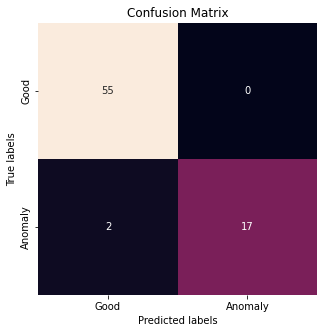

Fold 5/5
Epoch 1/30: Loss = 0.5347, Accuracy = 0.6103
Epoch 2/30: Loss = 0.1245, Accuracy = 0.9759
Epoch 3/30: Loss = 0.0579, Accuracy = 0.9759
Epoch 4/30: Loss = 0.0635, Accuracy = 0.9793
Epoch 5/30: Loss = 0.0255, Accuracy = 0.9931
Epoch 6/30: Loss = 0.0105, Accuracy = 0.9931
Epoch 7/30: Loss = 0.0408, Accuracy = 0.9897
Epoch 8/30: Loss = 0.0192, Accuracy = 0.9931
Epoch 9/30: Loss = 0.0090, Accuracy = 1.0000
Epoch 10/30: Loss = 0.0063, Accuracy = 1.0000
Epoch 11/30: Loss = 0.0036, Accuracy = 1.0000
Epoch 12/30: Loss = 0.0006, Accuracy = 1.0000
Epoch 13/30: Loss = 0.0003, Accuracy = 1.0000
Epoch 14/30: Loss = 0.0002, Accuracy = 1.0000
Epoch 15/30: Loss = 0.0001, Accuracy = 1.0000
Epoch 16/30: Loss = 0.0001, Accuracy = 1.0000
Epoch 17/30: Loss = 0.0001, Accuracy = 1.0000
Epoch 18/30: Loss = 0.0001, Accuracy = 1.0000
Epoch 19/30: Loss = 0.0001, Accuracy = 1.0000
Epoch 20/30: Loss = 0.0000, Accuracy = 1.0000
Epoch 21/30: Loss = 0.0000, Accuracy = 1.0000
Epoch 22/30: Loss = 0.0000, Accura

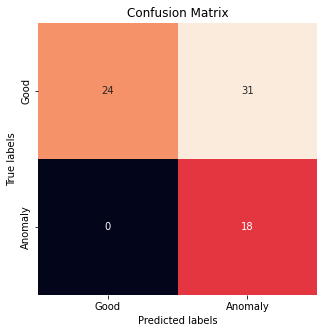

In [13]:
cv_folds = get_cv_train_test_loaders(
    root=data_folder,
    batch_size=batch_size,
    n_folds=n_cv_folds,
)

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)

for i, (train_loader, test_loader) in enumerate(cv_folds):
    print(f"Fold {i+1}/{n_cv_folds}")
    model = CustomVGG(2) #input_Size=2
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model = train(train_loader, model, optimizer, criterion, epochs, device)
    evaluate(model, test_loader, device)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'log_regression' is not defined

# Visualization

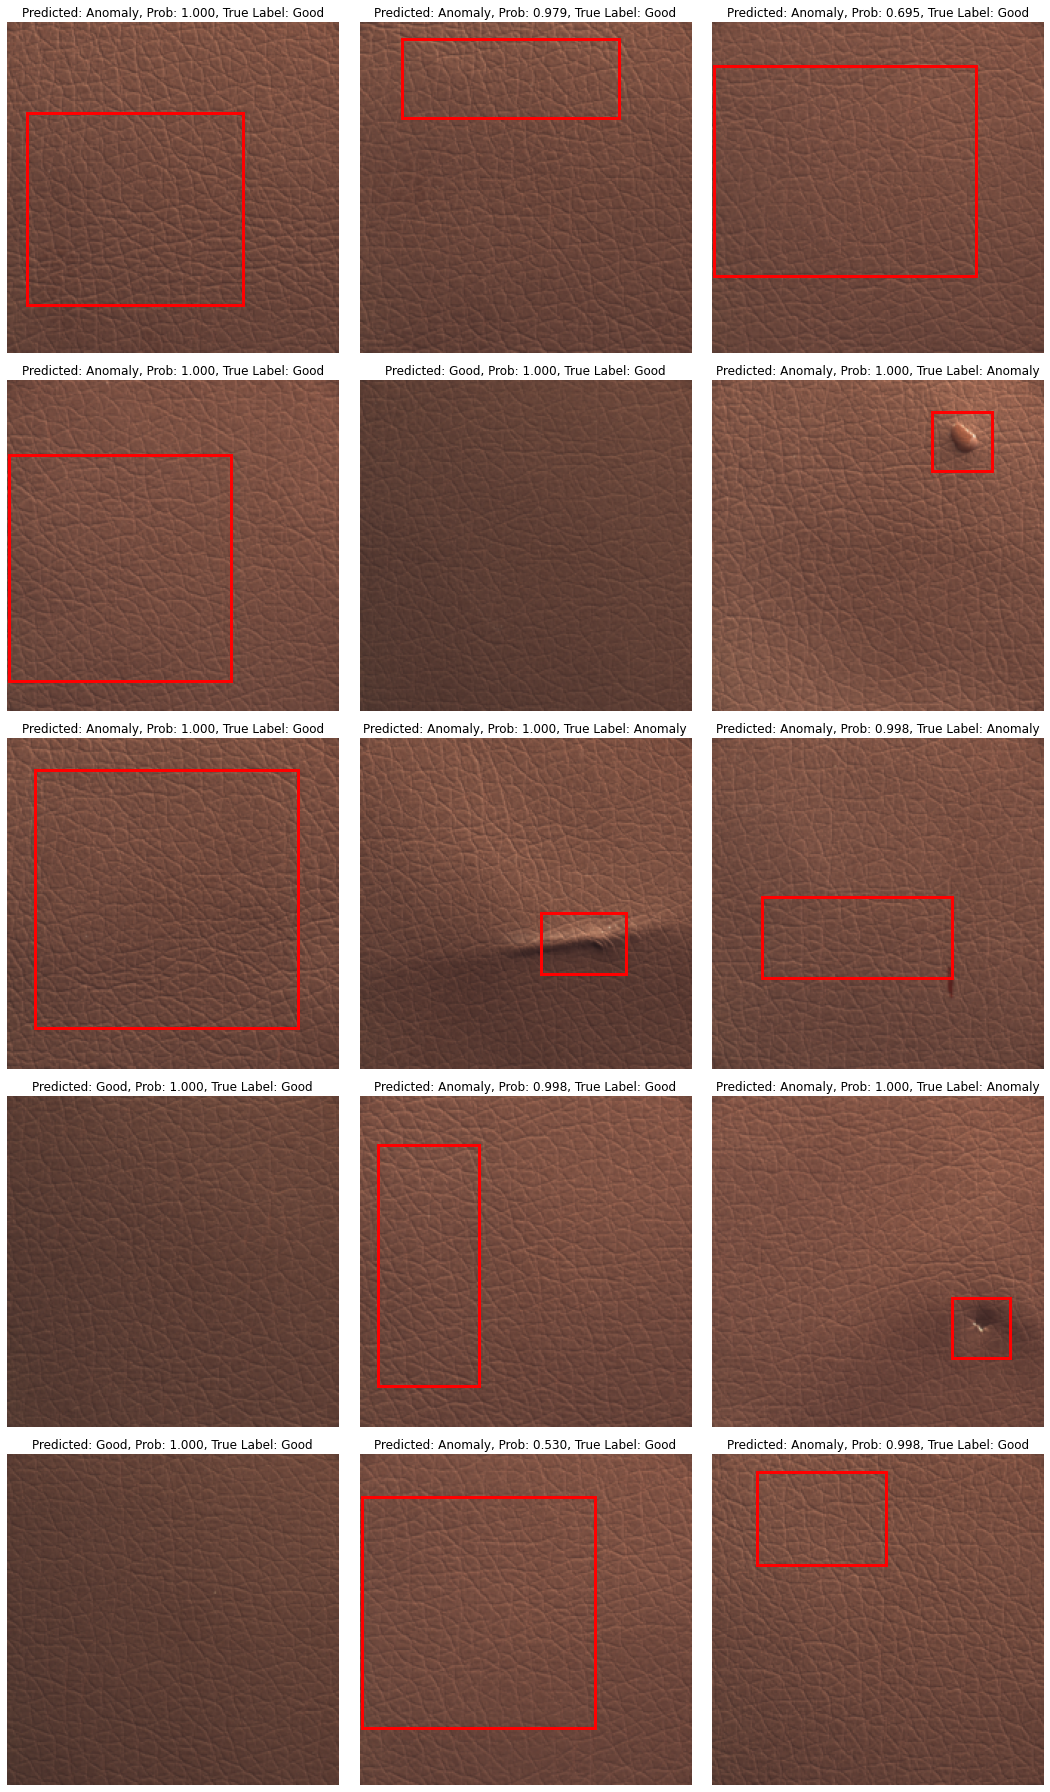

In [14]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, n_samples=15, show_heatmap=False
)